<a href="https://colab.research.google.com/github/avrland/polishNewsTitleDatabase/blob/main/Stats_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting data
We fetch data to analyse here from my github, then first first few lines and file stats.

In [1]:
import numpy as np
import os
#Open file and read first 10 news
!pip install wget
import wget
from collections import Counter
import collections

url = 'https://raw.githubusercontent.com/avrland/polishNewsTitleDatabase/main/titles.txt'
wget.download(url, '/content/titles.txt')
filename = '/content/titles.txt'  

file_size = os.path.getsize(filename)
file_size = round(file_size / (1024 * 1024), 3)
print("File Size is :", file_size, "MB")

f = open(filename, "r")
x = len(f.readlines())
print("Titles amount: " + str(x))

f = open(filename, "r")
p1 = Counter(f.read().split())
amount = len(list(p1.elements()))
print("Amount of words: " + str(amount))

with open(filename) as fn:  
  ln = fn.readline()
  lncnt = 0
  while lncnt < 5:
       print("Line {}: {}".format(lncnt, ln.strip()))
       ln = fn.readline()
       lncnt += 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=ab88c755f9bb43b0f7ce039f84224869cde5135b40c73e9ef48397bffd79f7de
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
File Size is : 8.677 MB
Titles amount: 114952
Amount of words: 1213788
Line 0: Polka straciła 36 tys. zł: napastnik wykiwał zarówno ją jak i bank
Line 1: Chrome 86 na Androida pozwoli zaplanować pobieranie. Można już testować
Line 2: Poczta Polska i cyfrowa rewolucja. Identyfikacja RFID przyspieszy wysyłki
Line 3: GOG GALAXY 2.0 łączy siły z Epic Games Store. Jest wreszcie oficjalna integracja
Line 4: Android Auto ma problem – miesza okładki odtwarzanych albumów


# Wordcloud
I removed manually short words (by stopwords) here without repeated, without any meaning and context.

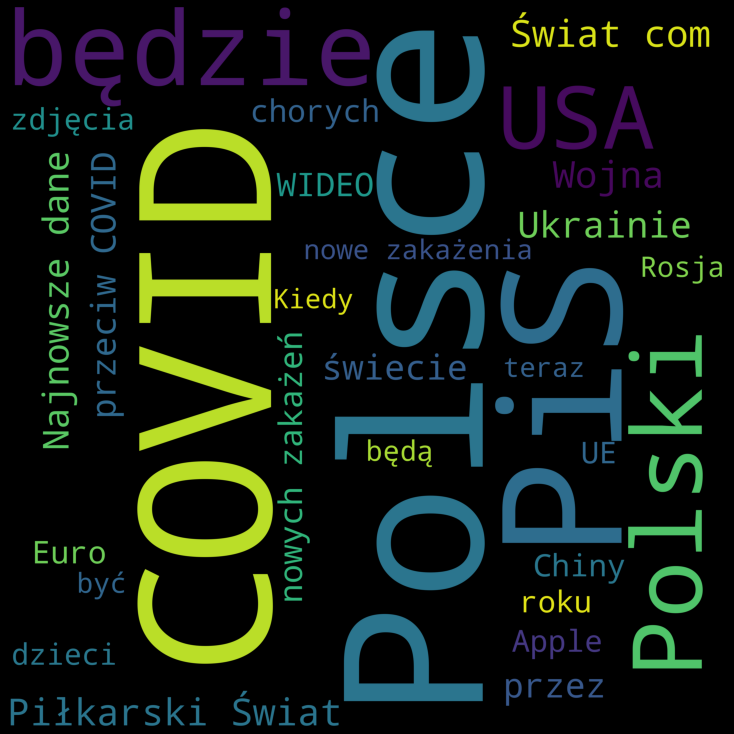

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


with open("titles.txt", "r") as file:
 text = str(file.read())

# Create the wordcloud object
wordcloud = WordCloud(width=4000, height=4000, margin=0, max_words = 30, 
                      stopwords = ['Polska', 'koronawirus', 'go', 'bez', 'tylko', 'jego', 'może', 'tym', 'ich', 'lat', 'Z', 'i', 'w', 'O', 'dla', 
                                   'jest', 'chce', 'Tak', 'jak', 'od', 'że', 'na', 'nie', 'czy', 'się', 'do', 'to', 'po', 'już', 'ale', 'ma', 'za', 'są', 'co', 'Pi', 'a']).generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Character per news stats
We are using IQR method to get rid of the outliers.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#News lenght stat section
data = pd.read_csv("titles.txt")
len(data)

char_lenghts = []
for x in range(len(data)):
    z = len(data.iloc[x,0])
    char_lenghts.append(z)
pd_char_lenghts = pd.DataFrame(char_lenghts)
pd_char_lenghts.columns = ['char amount']


[]

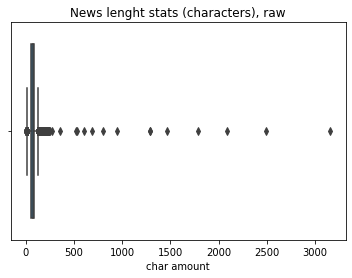

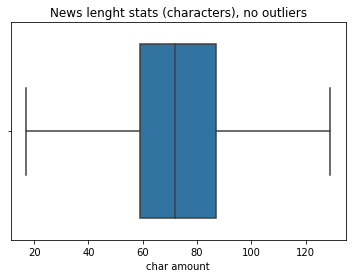

In [ ]:
plt.figure(facecolor='white')
sns.boxplot(x=pd_char_lenghts.iloc[:,0]).set(title='News lenght stats (characters), raw')
plt.plot()

Q1 = pd_char_lenghts.quantile(0.25) 
Q3 = pd_char_lenghts.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((pd_char_lenghts < (Q1 - 1.5 * IQR)) | (pd_char_lenghts > (Q3 +1.5 * IQR)))
pd_char_lenghts_IQR = pd_char_lenghts[~outlier_condition.any(axis=1)]

plt.figure(facecolor='white')
sns.boxplot(x=pd_char_lenghts_IQR.iloc[:,0]).set(title='News lenght stats (characters), no outliers')
plt.plot()

# Words per news stats
We are using IQR method to get rid of the outliers.

[]

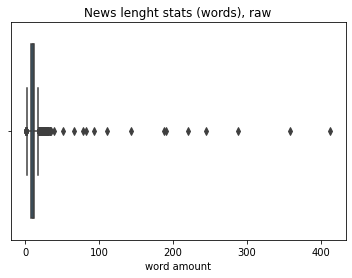

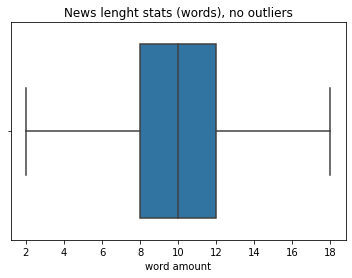

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#News lenght stat section
data = pd.read_csv("titles.txt")

#word amount
word_amount = []
for x in range(len(data)):
    sentence = data.iloc[x,0]
    words = len(sentence.split())
    word_amount.append(words)
pd_word_amount = pd.DataFrame(word_amount)
pd_word_amount.columns = ['word amount']

plt.figure(facecolor='white')
sns.boxplot(x=pd_word_amount.iloc[:,0]).set(title='News lenght stats (words), raw')
plt.plot()

Q1 = pd_word_amount.quantile(0.25) 
Q3 = pd_word_amount.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((pd_word_amount < (Q1 - 1.5 * IQR)) | (pd_word_amount > (Q3 +1.5 * IQR)))
pd_word_amount_IQR = pd_word_amount[~outlier_condition.any(axis=1)]

plt.figure(facecolor='white')
sns.boxplot(x=pd_word_amount_IQR.iloc[:,0]).set(title='News lenght stats (words), no outliers')
plt.plot()